<a href="https://colab.research.google.com/github/Emily311/Emily-Wang/blob/master/2_Building_Blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning for Media
#### MPATE-GE 2039 - DM-GY 9103

---


This is a class exercise for you to follow during the lecture. Notebook based on the companion materials of:

<blockquote>
"Deep Learning with Python", Second Edition by  F. Chollet, 2021.
</blockquote>

## A first look at a neural network

### Loading the MNIST dataset in Keras

In [ ]:
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
train_images.shape

(60000, 28, 28)

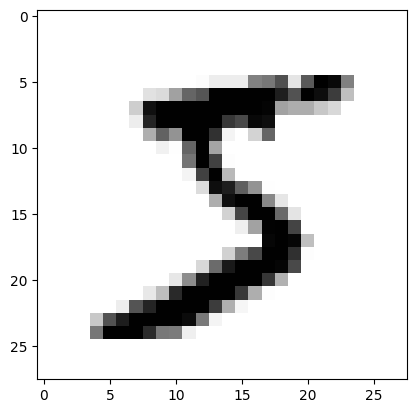

In [ ]:
digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


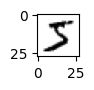

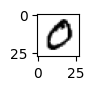

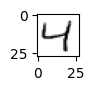

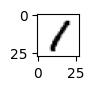

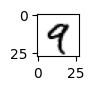

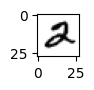

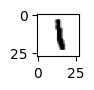

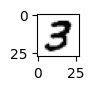

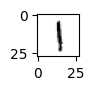

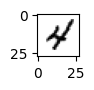

In [ ]:
plt.figure()
for i in range(10):
  digit = train_images[i]
  fig = plt.subplot(1, 10, i + 1)
  plt.imshow(digit, cmap=plt.cm.binary)
  plt.show()

In [ ]:
type(train_labels)

numpy.ndarray

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### The network architecture

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

### The compilation step

The `.compile()` operation is Tensorflow-specific, but we need a step like this anyway to set the loss function and the optimizer.

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### Preparing the image data

With this model, we don't care the (height, width) situation - the 2D-ness of the image.

The pixel intensity is originally represented as numbers in [0, 255]. For some computational reason, we'll shrink it to [0, 1].

In [ ]:
flatten_train_images = train_images.reshape((60000, 28 * 28))
flatten_train_images = flatten_train_images.astype("float32") / 255

flatten_test_images = test_images.reshape((10000, 28 * 28))
flatten_test_images = flatten_test_images.astype("float32") / 255

### "Fitting" the model

In [ ]:
model.fit(flatten_train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 13s 20ms/step - loss: 0.2617 - accuracy: 0.9251
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1059 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0695 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0502 - accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0376 - accuracy: 0.9890


### Using the model to make predictions

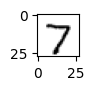

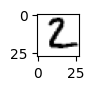

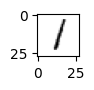

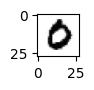

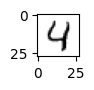

In [ ]:
test_digits = test_images[0:5]
for i, digit in enumerate(test_digits):
  fig = plt.subplot(1, 10, i + 1)
  plt.imshow(digit, cmap=plt.cm.binary)
  plt.show()

1/1 [==============================] - 0s 137ms/step


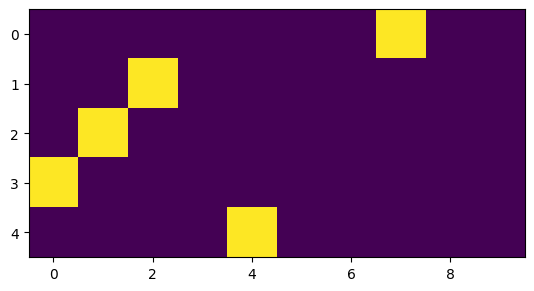

In [ ]:
predictions = model.predict(flatten_test_images[0:5])
plt.imshow(predictions)

In [ ]:
print(
    predictions[0].argmax(),
    predictions[1].argmax(),
    predictions[2].argmax(),
    predictions[3].argmax(),
    predictions[4].argmax()
    )

7 2 1 0 4


Text(0.5, 1.0, 'Predicted probabilty for the first test image')

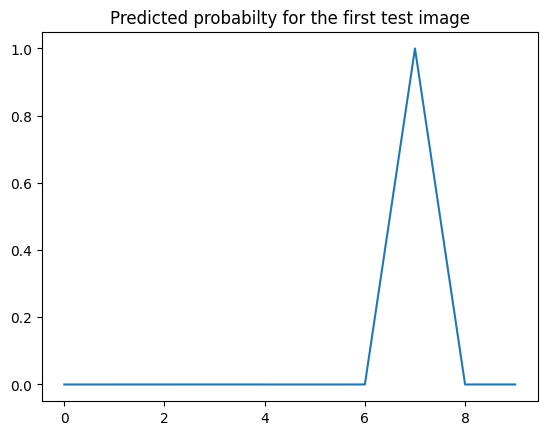

In [ ]:
plt.plot(predictions[0])
plt.title('Predicted probabilty for the first test image')

In [ ]:
test_labels[0]

7

### Evaluating the model on new data

In [ ]:
test_loss, test_acc = model.evaluate(flatten_test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0663 - accuracy: 0.9783
test_acc: 0.9782999753952026


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

### Vectors (rank-1 tensors)

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim

1

### Matrices (rank-2 tensors)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.ndim

3

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

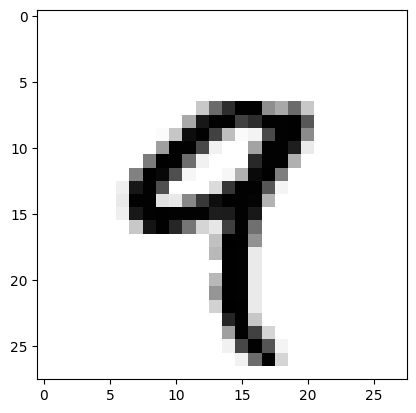

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [ ]:
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

In [ ]:
batch = train_images[:128]

In [ ]:
batch = train_images[128:256]

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

## The gears of neural networks: tensor operations

### Element-wise operations

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [ ]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.97 s


### Broadcasting

In [ ]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [ ]:
y = np.expand_dims(y, axis=0)

In [ ]:
Y = np.concatenate([y] * 32, axis=0)

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [ ]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)